<a href="https://colab.research.google.com/github/rashidpatel04/OASIS-INFOBYTE-TASK-2-BY-RASHID.P/blob/main/OASIS_INFOBYTE_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP**


# **PROJECT 2 PROPOSAL LEVEL 1 BY RASHID PATEL: CUSTOMER SEGMENTATION ANALYSIS**

# **Step 1: Data Exploration and Cleaning**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = '/content/ifood_df.csv'
data = pd.read_csv(file_path)
df=pd.DataFrame(data)

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Drop duplicates, if any
df.drop_duplicates(inplace=True)

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)


Dataset Preview:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  e

In [ ]:

# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  Acce

In [ ]:
# Check for outliers using summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41.575454  

# **Step 2: Descriptive Statistics**

In [ ]:
# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Analyze key customer metrics
if 'Purchase_Value' in df.columns:
    avg_purchase = df['Purchase_Value'].mean()
    freq_purchase = df['Purchase_Value'].count()

    print(f"\nAverage Purchase Value: {avg_purchase:.2f}")
    print(f"Frequency of Purchases: {freq_purchase}")
else:
    print("\nPurchase_Value column not found in dataset.")


Descriptive Statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41.5754

# **Step 3: Customer Segmentation Using K-Means**

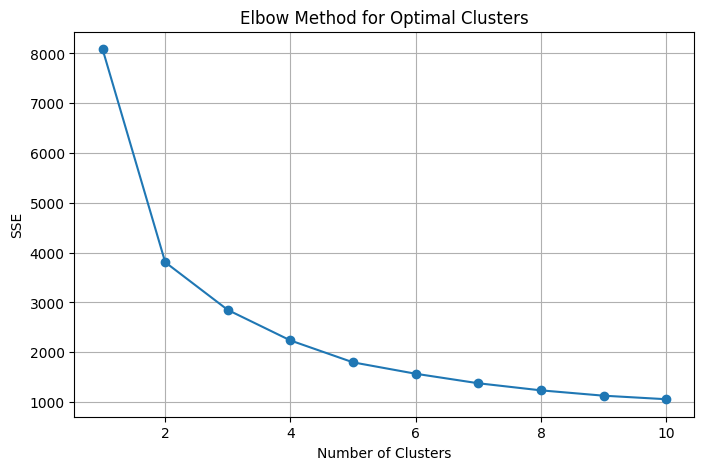


Cluster Assignments:
Cluster
3    578
0    567
2    534
1    342
Name: count, dtype: int64


In [ ]:
# Select features for clustering
features = ['Income', 'Recency', 'MntTotal', 'MntRegularProds']

data = df[features]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

# Apply K-Means with optimal number of clusters
optimal_clusters = 4  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

print("\nCluster Assignments:")
print(df['Cluster'].value_counts())


# **Step 4: Visualization of Customer Segments**

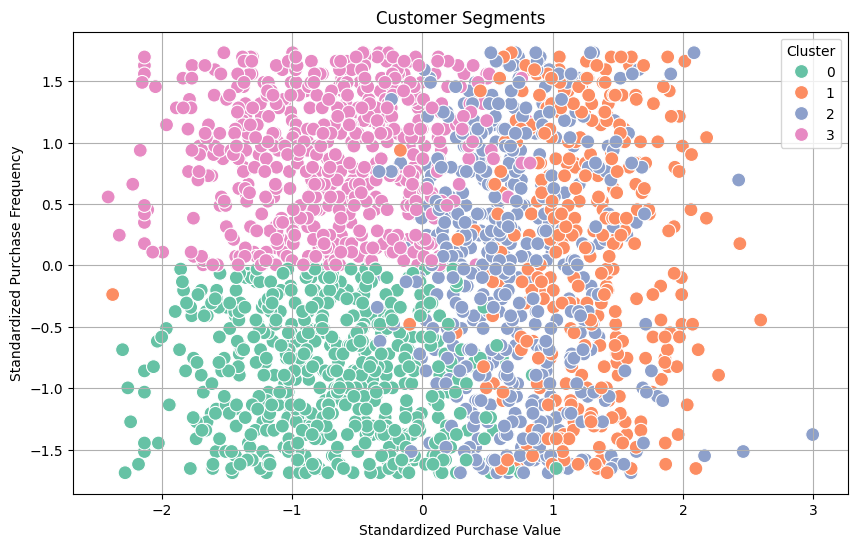

In [ ]:
# Scatter plot for customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_scaled[:, 0],
    y=data_scaled[:, 1],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Standardized Purchase Value')
plt.ylabel('Standardized Purchase Frequency')
plt.legend(title='Cluster')
plt.grid()
plt.show()


# **Step 5: Insights and Recommendations**

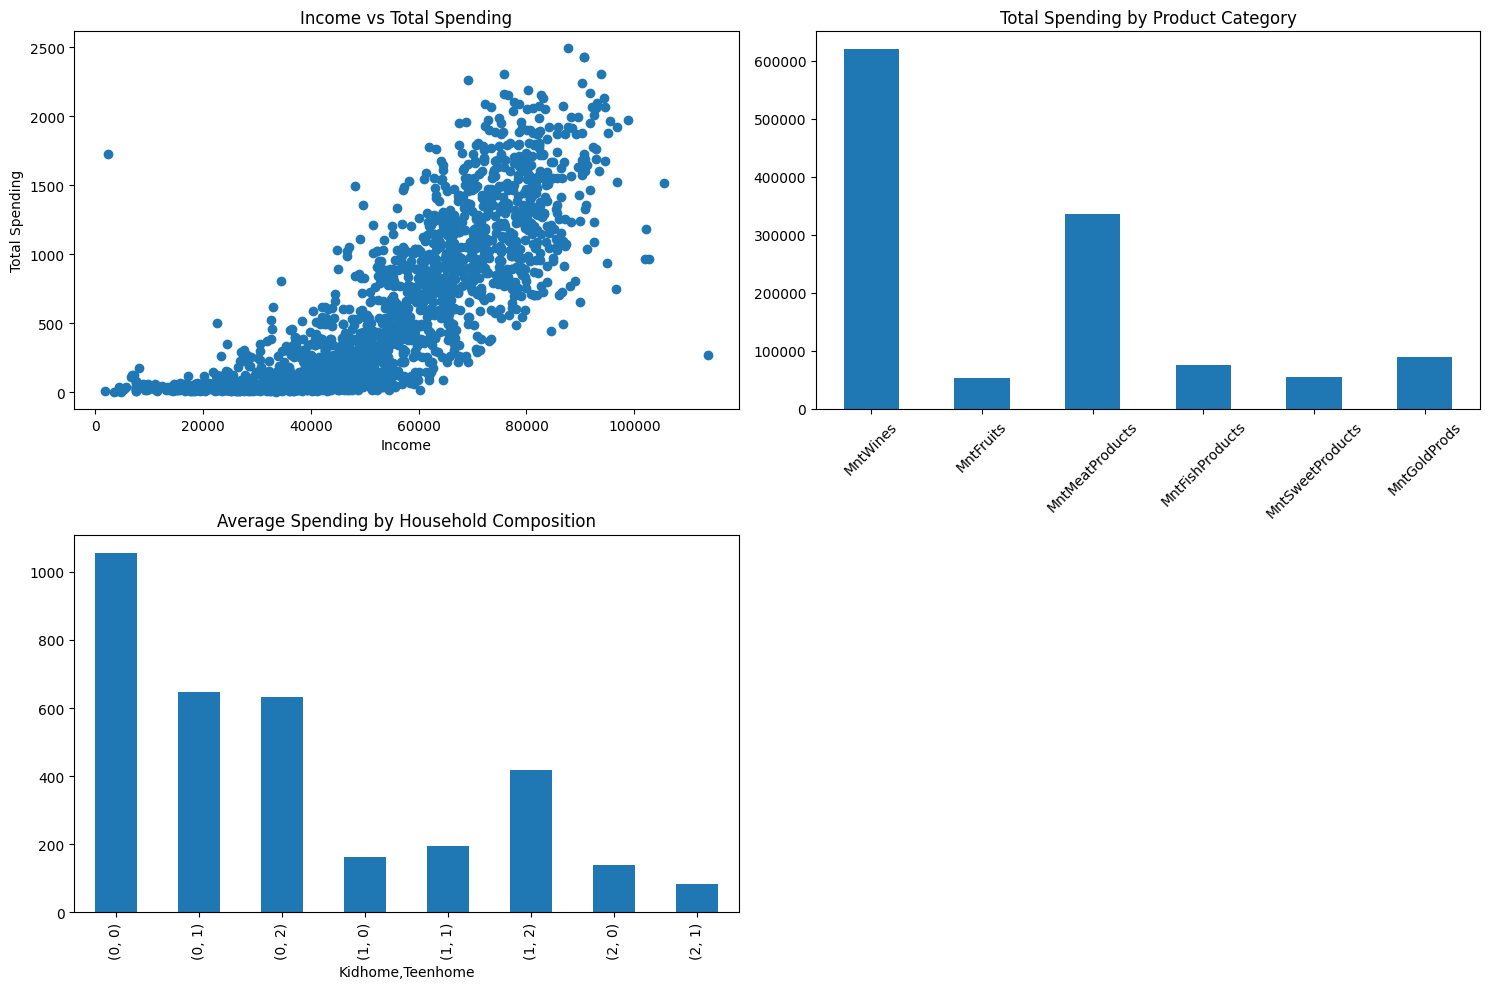

Market Insights:
Average Income: $51687.26
Total Customers: 2021
Average Household with Kids: 0.44
Average Household with Teens: 0.51
Top Spending Category: MntWines ($619421.00)
Lowest Spending Category: MntFruits ($53283.00)

Campaign Insights:
Overall Campaign Acceptance Rate: 30.23%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def segment_analysis(df):
    # Income and Spending Analysis
    plt.figure(figsize=(15, 10))

    # Income vs Total Spending
    plt.subplot(2, 2, 1)
    plt.scatter(df['Income'], df['MntTotal'])
    plt.title('Income vs Total Spending')
    plt.xlabel('Income')
    plt.ylabel('Total Spending')

    # Spending by Product Category
    product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    spending_by_category = df[product_categories].sum()

    plt.subplot(2, 2, 2)
    spending_by_category.plot(kind='bar')
    plt.title('Total Spending by Product Category')
    plt.xticks(rotation=45)

    # Household Composition Impact
    plt.subplot(2, 2, 3)
    df.groupby(['Kidhome', 'Teenhome'])['MntTotal'].mean().plot(kind='bar')
    plt.title('Average Spending by Household Composition')

    plt.tight_layout()
    plt.show()

    # Key Insights
    insights = [
        f"Average Income: ${df['Income'].mean():.2f}",
        f"Total Customers: {len(df)}",
        f"Average Household with Kids: {df['Kidhome'].mean():.2f}",
        f"Average Household with Teens: {df['Teenhome'].mean():.2f}",
        f"Top Spending Category: {spending_by_category.idxmax()} (${spending_by_category.max():.2f})",
        f"Lowest Spending Category: {spending_by_category.idxmin()} (${spending_by_category.min():.2f})"
    ]

    # Campaign Acceptance Analysis
    campaign_insights = [
        f"Overall Campaign Acceptance Rate: {df['AcceptedCmpOverall'].mean()*100:.2f}%"
    ]

    return insights, campaign_insights

# Assuming df is your DataFrame
insights, campaign_insights = segment_analysis(df)

print("Market Insights:")
for insight in insights:
    print(insight)

print("\nCampaign Insights:")
for campaign_insight in campaign_insights:
    print(campaign_insight)